In [2]:
# analisis exploratorio caso titanic

#1. cargar lobrerias

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# funciones 

#cargar data ya sea csv o xlsx

def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')


## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

## funcion para visualizar data en histograma
def histoplot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

##FUncion reemplazo de datos categóricos NAN
def imputacionCatNA(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

In [3]:
#analisis inicial
data = importDatos('./data_sets/','Titanic','.csv')
datos_NAN(data)

## funcion para determinar datos categoricos 
categoricas = [i for i in data.columns if data[i].dtype=='O']
print('hay {} variables categoricas y'.format(len(categoricas)))
print('las variables categoricas son \n', categoricas)

categoricasNumericas = [i for i in data.columns if data[i].dtype!='O']
print('hay {} variables categoricas numericas y'.format(len(categoricasNumericas)))
print('las variables categoricas numericas son \n', categoricasNumericas)



Dimesiones: 891 filas, 12 columnas
Total de Valores NAN: 866
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88        177
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         147        687
                                E

In [4]:
## distribucion de frecuencias
for i in categoricas :
    print(round(data[i].value_counts()/np.float64(len(data)),3)*100)



Braund, Mr. Owen Harris                     0.1
Boulos, Mr. Hanna                           0.1
Frolicher-Stehli, Mr. Maxmillian            0.1
Gilinski, Mr. Eliezer                       0.1
Murdlin, Mr. Joseph                         0.1
                                           ... 
Kelly, Miss. Anna Katherine "Annie Kate"    0.1
McCoy, Mr. Bernard                          0.1
Johnson, Mr. William Cahoone Jr             0.1
Keane, Miss. Nora A                         0.1
Dooley, Mr. Patrick                         0.1
Name: Name, Length: 891, dtype: float64
male      64.8
female    35.2
Name: Sex, dtype: float64
347082      0.8
CA. 2343    0.8
1601        0.8
3101295     0.7
CA 2144     0.7
           ... 
9234        0.1
19988       0.1
2693        0.1
PC 17612    0.1
370376      0.1
Name: Ticket, Length: 681, dtype: float64
B96 B98        0.4
G6             0.4
C23 C25 C27    0.4
C22 C26        0.3
F33            0.3
              ... 
E34            0.1
C7             0.1
C54   

In [5]:
## extraer patrones en la data en este caso .mr y miss.
data['Inicial']=0
for i in data:
    data['Inicial'] = data.Name.str.extract('([A-Za-z]+)\.')
data.Inicial

##cruzar variables en las tablas 
pd.crosstab(data.Inicial, data.Sex).T.style.background_gradient(cmap='summer_r')



Inicial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [6]:
#eliminar categorias 
data['Inicial'].replace(['Mlle','Mme', 'Ms','Dr','Major', 'Lady','Countess','Jonkheer'
                         , 'Col','Rev','Capt','Sir','Don','Master'], ['Miss','Miss','Miss','Mr','Mr','Mrs'
                                                             ,'Mrs','Other','Other','Other','Mr','Mr','Mr','Child'], inplace=True)
data.Inicial.value_counts()




Mr       529
Miss     186
Mrs      127
Child     40
Other      9
Name: Inicial, dtype: int64

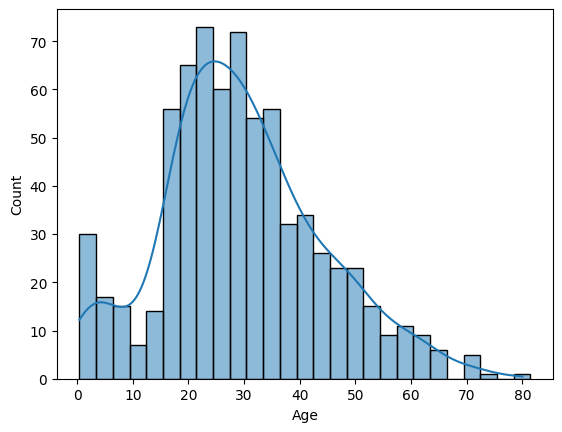

In [7]:
##Histograma de edades 
histoplot(data, 'Age', 3)

In [8]:
## reemplazar datos Nan en edad con base a tipologia
data.loc[(data.Age.isnull())&(data.Inicial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Inicial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Inicial=='Child'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Inicial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Inicial=='Other'), 'Age']=46

data.Inicial.value_counts()

Mr       529
Miss     186
Mrs      127
Child     40
Other      9
Name: Inicial, dtype: int64

In [9]:
print('despues de reemplazar edades por el promedio \n')
datos_NAN(data)

despues de reemplazar edades por el promedio 

Dimesiones: 891 filas, 13 columnas
Total de Valores NAN: 689
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88          0
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         1

In [10]:
#promedio de edad
round(data.groupby('Inicial')['Age'].mean(),0)

Inicial
Child     5.0
Miss     22.0
Mr       33.0
Mrs      36.0
Other    46.0
Name: Age, dtype: float64

In [11]:
##Imputación CAT NAN Embarked
data['Embarked'] = imputacionCatNA(data, 'Embarked')

datos_NAN(data)

Dimesiones: 891 filas, 13 columnas
Total de Valores NAN: 687
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88          0
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         147        687
                                E

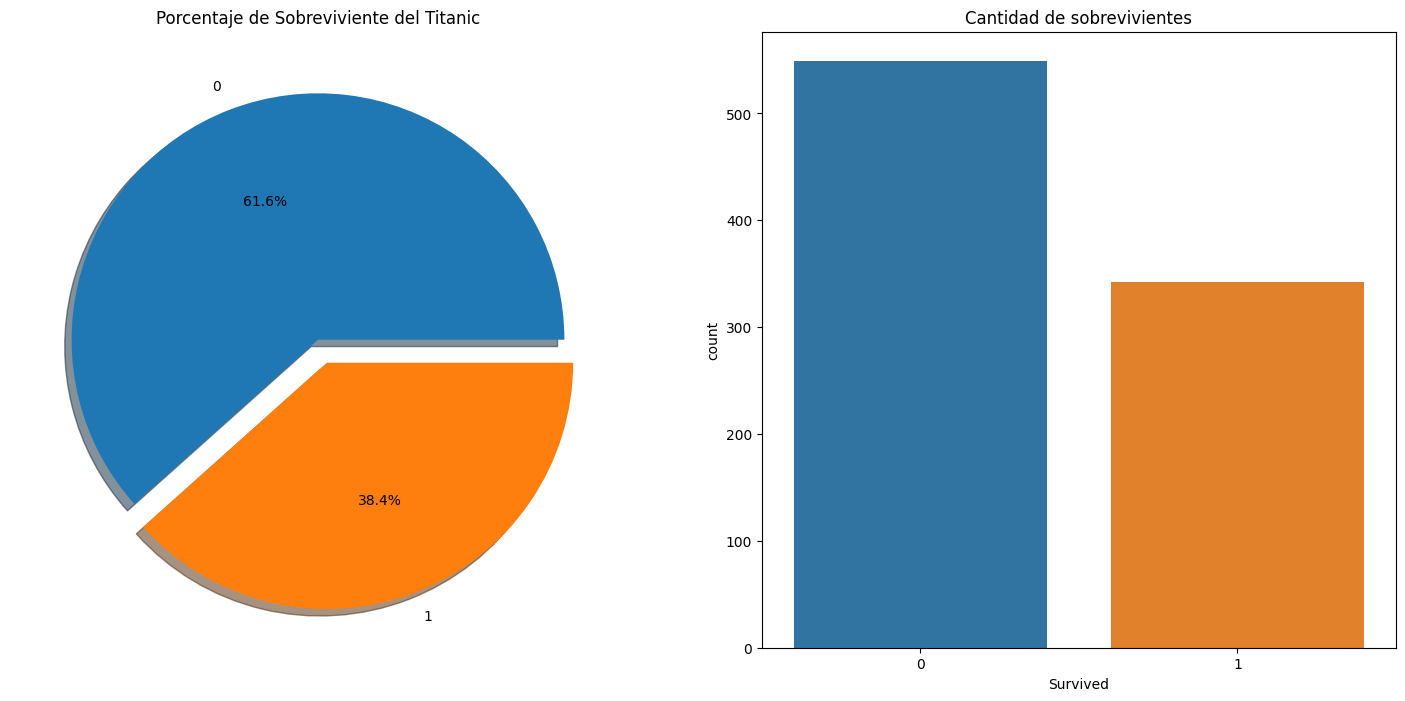

In [12]:
##Cuántas personas sobrevivieron o fallecieron?

f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Porcentaje de Sobreviviente del Titanic')
ax[0].set_ylabel('')

sns.countplot( data=data,ax=ax[1], x='Survived')
ax[1].set_title('Cantidad de sobrevivientes')

plt.show()

In [13]:
##Analisis de tablas cruzadas
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

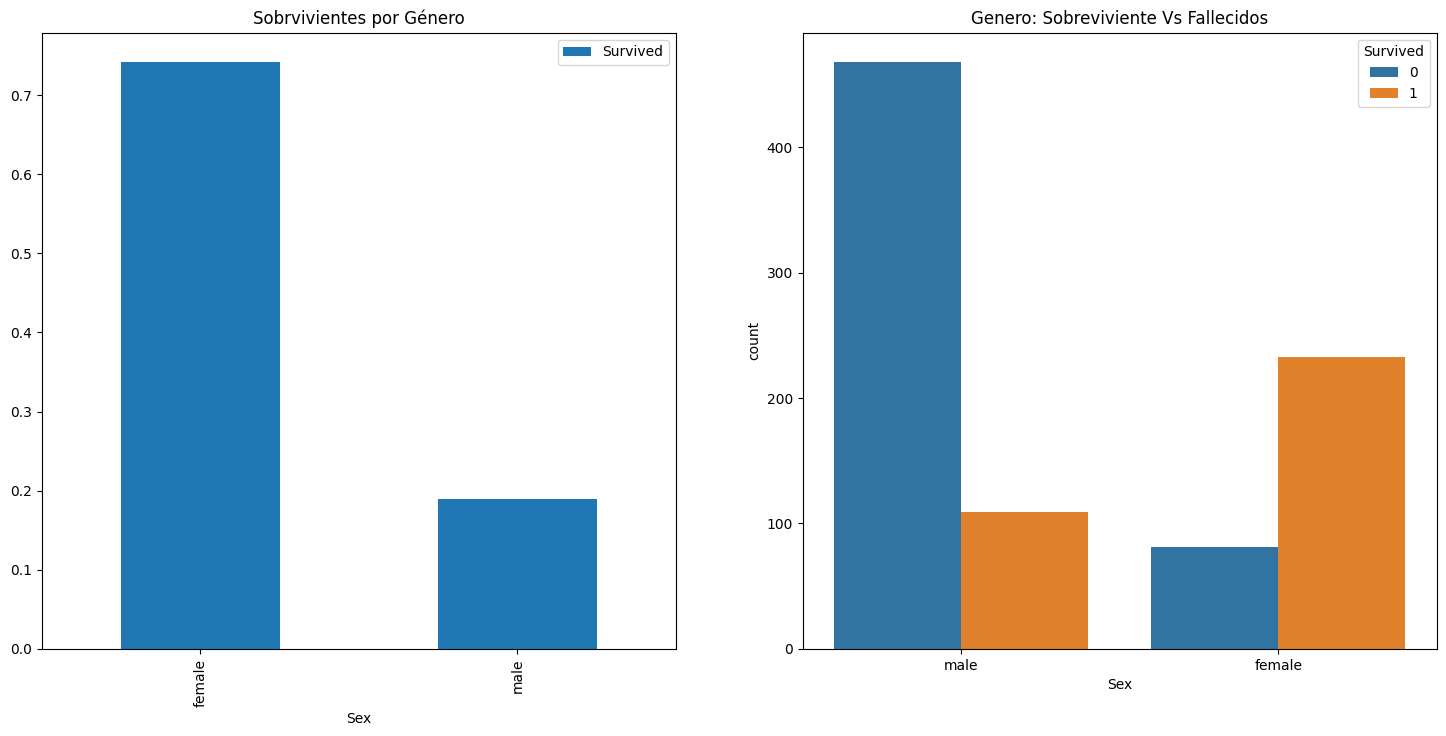

In [14]:
##Cruzar valores SEX, Survived
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sobrvivientes por Género')

sns.countplot(data=data, x='Sex', hue='Survived')
ax[1].set_title('Genero: Sobreviviente Vs Fallecidos')

plt.show()

In [15]:
##Tabla cruzada con clases Vs Survived
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r') peachleaks

SyntaxError: invalid syntax (509100859.py, line 2)

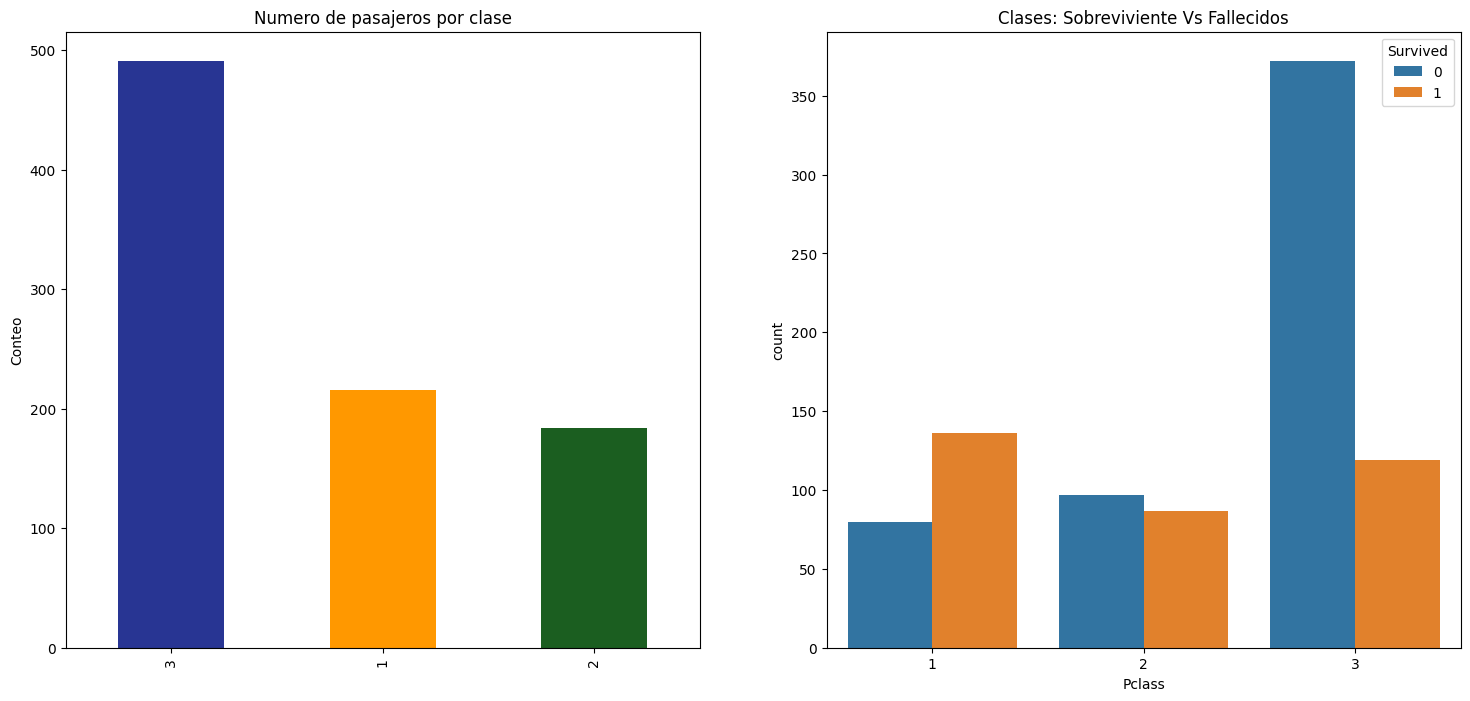

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#283593','#ff9800','#1b5e20'], ax=ax[0])
ax[0].set_title('Numero de pasajeros por clase')
ax[0].set_ylabel('Conteo')

sns.countplot(data=data, x='Pclass', hue='Survived')
ax[1].set_title('Clases: Sobreviviente Vs Fallecidos')

plt.show()

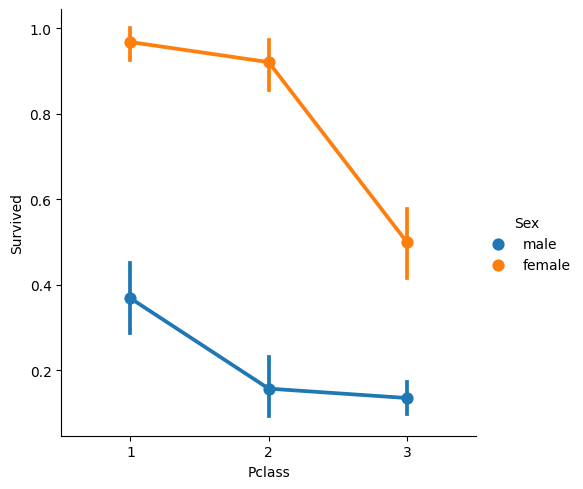

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data,kind="point")
plt.show()

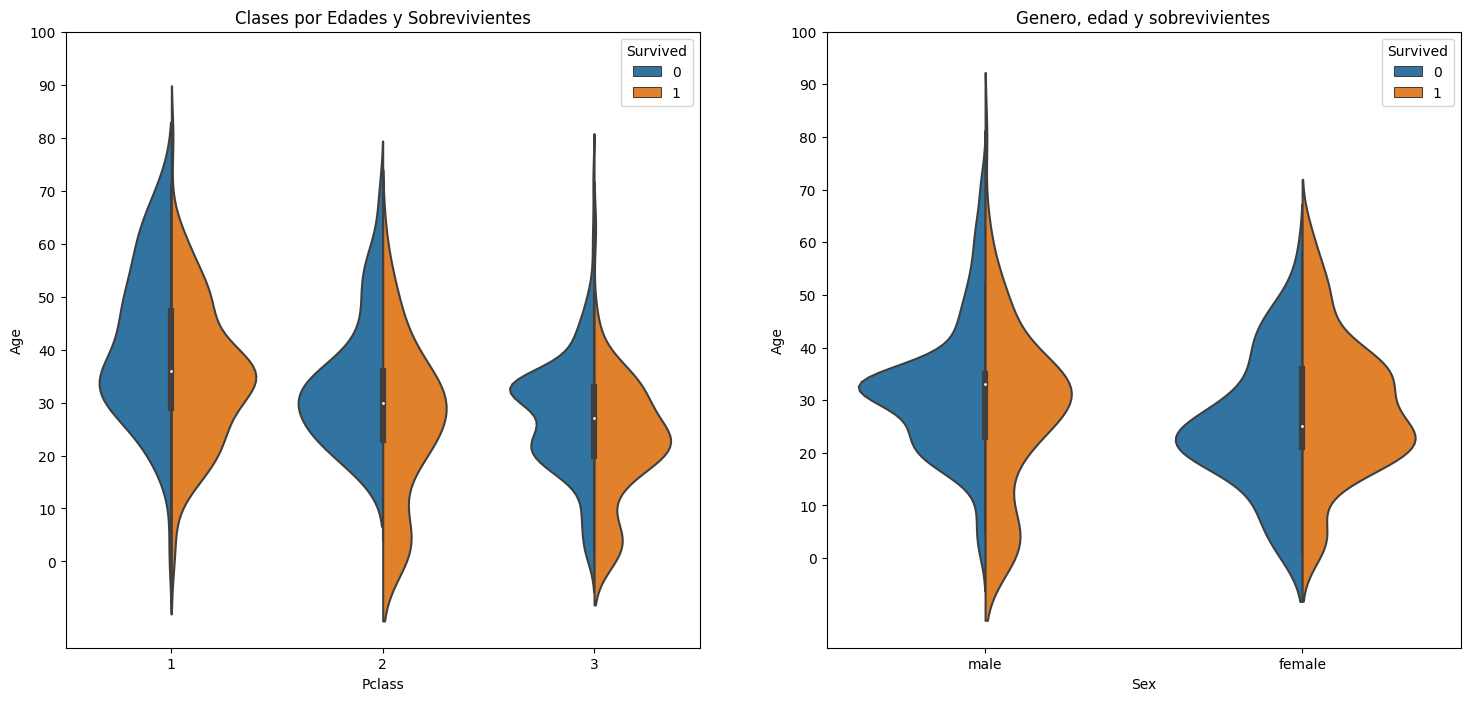

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='Pclass',y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Clases por Edades y Sobrevivientes')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived',data=data, split=True, ax=ax[1] )
ax[1].set_title('Genero, edad y sobrevivientes')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Inicial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [1]:
##Test de normalidad de Shapiro-wilk
##P > 0.05 = Normal - Candidata a predecirse - clasificar / target
##P < 0.05 = No normal - no son buenas candidatas para machine learning.
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro